# Machine Learning for Absolute Beginners
### Using Scikit-Learn, *by Hailey K Buckingham*

In this tutorial, we'll be introducing a few basic components of the world of machine learning. For people who haven't worked with stats and machine learning, there can be a sense of the arcane surrounding the field, and as a result it is easy to feel defeated before ever beginning.

However, I think you will see that the concepts aren't really that bad, and especially with scikit-learn, the coding isn't hard either! 

### What is Machine Learning?

> "Machine learning is a subfield of computer science that evolved from the *study of pattern recognition* and computational learning theory in artificial intelligence. ... Machine learning explores the study and construction of algorithms that can *learn from and make predictions on data.*"
>                                                         -Wikipedia-

Intuitively, you can think of the field of machine learning as the art of programming computers to find patterns, see trends, and make predictions. The data that can be used for machine learning can be anything at all: numbers (prices, quantities, measurements), words (text, recordings, symbols) or even images.  For today's tutorial, we'll primarily be focusing on numbers, since they are easy to work with in code, but at the end, there are links to interesting examples using other kinds of data.


### Important Terms 

* *sample*:  a single example from the data.
* *feature*: a single piece of information about a sample.
* *class*: a category into which a sample fits
* *classifier*: a piece of code that looks at a sample and decides what class(es) it is likely to be a part of.



### Getting Started

The first coding task we'll need to do is to import the libraries that we'll be using.

* numpy: standard python library for efficiently working with lots of numbers
* scipy: lots of great statistics and mathematics functions for python
* sklearn: Scikit-learn is a popular machine learning library which is easy to get started with
* matplotlib: a graphing library
* seaborn: another graphing library that makes matplotlib plots look much nicer.

In [2]:
#basic imports
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib import patches

#sklearn: helpful tools
from sklearn import datasets
from sklearn import cross_validation

#sklearn: machine learning tools
from sklearn import linear_model
from sklearn import ensemble
from sklearn import svm
from sklearn import cluster

#a library that makes matplotlib plots look much nicer
import seaborn

#have matplotlib display it's graphs right here in this notebook
#instead of in a separate window.
%matplotlib inline



### A few plotting functions that we'll save for later

Below are a couple of plotting functions that I wrote for this tutorial. You don't need to look at them in any detail, but we'll be using them later on to show how some of our code is running. 

In [7]:
""" Class Plotting Functions

Plots the different classes in a dataset in different colors (up to 8 classes)

"""
def plot_classes(X, y, index_axis_0=0, index_axis_1=1):
    colors = ['b','g','r','c','m','y','k','w']

    fig = plt.figure()
    for cls, color in zip(np.unique(y), colors):
        _X = X[np.where(y==cls)]
        plt.scatter(_X[:, index_axis_0], _X[:, index_axis_1], c=color)
    
    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")
    
    plt.show()

In [25]:
"""Classification Plotting Function

Plots classification regions from a classifier, showing how new point will be
classified. Optionally, plots the original data as well.

"""

def plot_classification(classifier, X_data, y_data, index_axis_0=0, index_axis_1=1, show_data=True):
    colors = ['b','g','r','c','m','y','k','w']
    
    min_x = np.min(X_data[:, index_axis_0])
    max_x = np.max(X_data[:, index_axis_0])
    min_y = np.min(X_data[:, index_axis_1])
    max_y = np.max(X_data[:, index_axis_1])
    space_x = max_x - min_x
    space_y = max_y - min_y
    max_space = max(space_x,space_y)
    
    points_x = 35
    points_y = 25
    x_range = np.linspace(min_x, max_x, points_x)
    y_range = np.linspace(min_y, max_y, points_y)
    
    fig1 = plt.figure(figsize=(8, 6))
    #ax1 = fig1.add_subplot(111, aspect='equal')

    for i in x_range:
        for j in y_range:
            #build the point to be predicted, setting all other values to zero
            pred_data = np.zeros( len(X_data[0]) )
            pred_data[index_axis_0] = i
            pred_data[index_axis_1] = j
                                 
            pred = classifier.predict((pred_data.reshape(1, -1)))
            prob = classifier.predict((pred_data.reshape(1, -1)))

            plt.scatter(i,j, c=colors[pred[0]], marker="s", s=100, alpha=0.4)
    
    if show_data:
        for cls, color in zip(np.unique(y_data), colors):
            _X = X_data[np.where(y_data==cls)]
            plt.scatter(_X[:, index_axis_0], _X[:, index_axis_1], c=color, s=30)
    
    plt.show()

# Classification

To begin our tour, lets start with the idea of classification. 

The intuitve idea is simple: you have a bunch of things that belong to one or another category, and you separate them into boxes based on their categories. 

1. You look at the things in each box and see if there are any differences between things in one box and things in another. 
2. You might notice a couple of features of things in the first box, which are almost always different than the things in the second box.
3. Then, when you see a new thing that hasn't been put into a box yet, you look for those features that you noticed before, and decide which box to put the new thing into.

This is the task of classification. We start with a set of objects, records, samples, or examples which have already been classified. We learn some rules for distinguishing between the classes. We use those rules to automatically classify new examples which have not yet been classified.

Doing this in code means we have to start with a couple of things:
1. We need a list of records or *samples* which have information called features. Features, as described above, are the pieces of information we can use to try to differentiate between samples from one category or *class* and samples from another.
2. We need class labels for these samples.  For our purposes today, each of the samples in the starting set needs to come pre-labeled. That is, we need to know which class each sample belongs to.

We'll typically hold these values in two arrays or lists. The samples often get put into an array called "X", and the labels (sometimes also called "targets") get put into an array called "y".

The X array is usually sorted such that each row represents a single sample, and each column represents a single feature for which each sample has a value.  The y array matches with the X array, but has only a single column containing the class labels for each record. The first row of the X array correpsonds with the first row of the y array. For instance, the 1oth sample would be in whatever class is recorded in the 10th row of y, and would have features recorded in the 10th row of X.

Let's begin by having scikit-learn create some classes and features for us. We'll use the sklearn.datasets library for this, and call the "make_blobs" function.  This function will make two or more classes of "things" which each have two or more features. For our first example, we'll start with just two classes, with two features, which will make it easy for us to plot an image of our data, as you'll see in a moment.

Notes:
* 'centers=2' is telling the make_blobs method to give us two classes, each with it's own "center".
* 'random_state=0' is telling the function where to start it's random number generator. This lets us re-create a dataset by giving the same random_state. Leaving it blank will let the function choose it's own starting space (a bit of an over-simplificaiton here, but it'll do for now)

In [20]:
X, y = datasets.make_blobs(centers=2, random_state=0)

Now we have our two arrays: X, and y.  Lets see what this looks like:

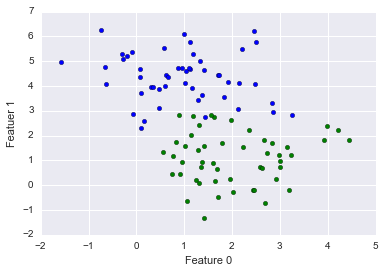

In [21]:
plot_classes(X,y)

In the graph above, we have two 'blobs' of samples, each represented by different colors. Each point represents one sample, and has two values associated with it: the value for the x axis, and the value for the y axis. These values are the features for each point. 

The samples colored in green are from one class (or blob), and the blue samples are from another. Green points seem to have lower values for 'Feature 1' than blue points, and it also looks like green points tend to have slightly higher values for 'Feature 0'.

No imagine that you have to make a rule, or set of rules, that describes whether a point should be a blue one or a green one, based on the blue and green points you already see. One possibility is to make a rule that says, any point with a value for Featurr 1 (the vertical axis) greater than 3 is a blue one, and all the rest are green ones. This isn't a perfect rule, since there are several blue points which would be labeled as green, but overall, we'd classify the points fairly accurately.

Alternatively, you might suggest drawing boxes around certain areas of the graph to separate the blues and greens. There are probably a lot of other ways you can think of to divide up the graph to separate the colors.

These sets of rules will be the goal of our machine learning functions. What we want is for a function to look at the data for us, and come up with a really good way of classifying points without having to draw lines or circles or boxes ourselves.

### Logistic Regression Classifiers
The first classifier we'll look at is called a logistic regression classifier. In statistics and other fields, the term *regression* usually means fitting a line through some data, to help describe trends in the data (i.e are food prices increasing or decreasing over time, etc...). Here, instead of fitting a line *through* the data, we'll be asking scikit-learn to fit a line *between* the two blobs of data, so that the two kinds of point are separated as well as possible.

The code is very straight-foward.  First, we'll make a classifier object. Then, we'll tell it to look at the data using it's .fit() method. Lastly, we'll see how it did with a visual plot of it's line.

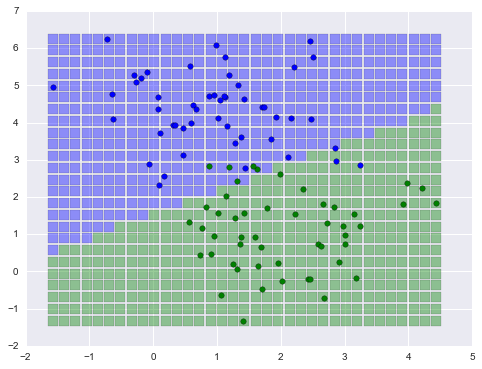

In [26]:
# make a logistic regression classifier object
classifier = linear_model.LogisticRegression()

# have the classifier look at our data and make it's best attempt at a dividing-line
classifier.fit(X,y)

# lets see how it did (Note: this might take just a moment; my plotting function isn't especially fancy or fast)
plot_classification(classifier, X, y)

The plot above now shows the original data on top of two colored regions; a blue one in the upper left, and a green one in the lower right. Most of the original blue points fall in the blue region, and most of the green points fall in the green region. 

*(Note: Even though the plotting function shows a sort of stair-step line between the two regions, the logistic regression classifier is actually choosing a straight line. The stair-stepping effect is because of how my crude plotting function works.)*

If we were to randomly pick a new point that didn't already have a class (i.e. blue or green), we could plot it in the graph above and see which side of the line it fell on to determine our classification. However, we already know that the above classifier isn't perfect, since we can see that some of the point are not in the right regions. So just how accurate *IS* this classifier?

### Testing Sets and Training Sets
To make some measurements about how well our classifier is doing, we will want to use a trick that is a standby of the machine learning world. Instead of letting our classifier see the whole data set, we'll actually only give it a subsection of the data. Then, once our classifier has made it's best set of rules for dividing up the classes, we can see how accurate it is at predicting the *known* labels of the data it did not yet see. This can give us a direct measurement of how well a classifier is doing it's job.  This also gives us a handy way of comparing different kinds of classifiers to each other in a fairly unbiased way.

To start, we'lll use a handy tool that comes in the sklearn library, called cross_validation. This module gives us several different functions for elegantly dividing up our data into two sets. It takes care of making sure that our sub-sections are randomly shuffled (if desired), that there are examples of each class in both sets, and other concerns as well. To invoke it, we can start by just handing over our X and y arrays, and telling it what percent of the data we'd like to save for testing. The rest can be used for training our classifiers:

In [22]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.25)

To verify, lets look at the lenghts of our arrays:

In [28]:
print("Full set: " + str(len(X)))
print("Training set: " + str(len(X_train)))
print("Testing set: " + str(len(X_test)))

Full set: 100
Training set: 75
Testing set: 25


Now let's train our classifer again, but this time, only give it the training data. Then, we'll use a built-in scoring method to see how well the classifier can predict the actual classes of each sample in the *testing* data.

In [32]:
classifier = linear_model.LogisticRegression()
#note that we're training with the X_train, and y_train arrays
classifier.fit(X_train, y_train)

#and scorign with the X_test, and y_test arrays.
success_rate = classifier.score(X_test, y_test)

print("Success Rate on the Testing Data:")
print( success_rate )

Success Rate on the Testing Data:
0.92


The success rate of our logistic regression classifier is 92% with the testing data.  We can use this as a measurement of how well we might expect our classifier to do on new data points that it hasn't seen.

### Making our Classifier Better
Depending on our situation, a 92% success rate may or may not be good enough. For some tasks, we might be thrilled to succeed over 90% of the time, but for others, anything short of near-perfect may not be good enough (think of auto-driving cars, or medical screenings).

So how can we make our classifer better?

 1) More Samples!  The more data you have, the more your classifier has to work with, which can help significantly improve accuracy.

 2) More Features!  In the examples above, we've only had two values to work with for each sample. If we were classifying fruit as citrus or not-citrus, our features might be weight and circumfrence of a fruit. This is certainly a start, but there are probably a lot of other features of a fruit (color, sweetness, moisture content, seed count, etc...) that could help us make a much better classification. 

 3) Better set of rules!  It is possible that our classifier just isn't looking at the data as well as it could. For instance, if our classes were concentric circles, having a logistic regression classifier draw a straight line through them would probably not help much, regardless of how many samples or features we had.

So what other kinds of classifiers can we use?  Lots!  But for now, lets start with a popular classifier called a "Random Forest"

### Random Forest Classifiers
A random forest classifier works very differently from a logistic regression classifier. Instead of drawing a single line through the data and stopping, a random forest will continue to draw lines to further subdivide the data until we either tell it to stop. There is a lot more going on under the hood than this, but from an intuitive perspective, you can think of random forests in this way. 

Using a random forest classifier in scikit-learn is nearly identical to using our logistic regression classifier. Lets start with the same data set as above, and then move on to a trickier one.

In [33]:
#we start the same way, except our object comes from a different sklearn library
classifier = ensemble.RandomForestClassifier()

#the rest of the code is identical!
classifier.fit(X_train, y_train)

success_rate = classifier.score(X_test, y_test)

print("Success Rate on the Testing Data:")
print( success_rate )

Success Rate on the Testing Data:
0.92


It turns out, that our random forest classifier has about the same success rate as the logistic regression, so in this case, neither one seems to outperform the other (note however, that we have only used the default settings on both classifiers)

But let's see how the random forest classifier divided up the space:

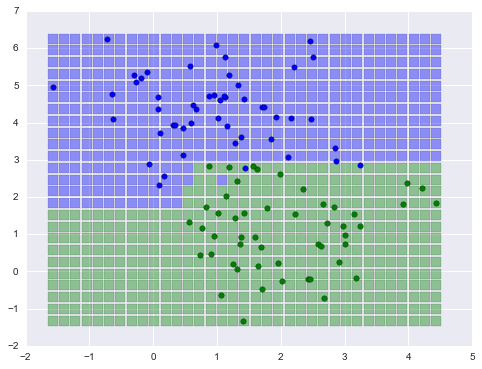

In [34]:
plot_classification(classifier, X, y)

The graph above is somewhat different that what we saw before. Instead of a straight line between the blobs, we now have a series of lines creating a somewhat more complex boundary between the two classes.

All things considered, the two aren't that much different in this case, but perhaps you can imagine cases where the random forest might do a better job. 

For instance, what if the blobs are shaped like moons?

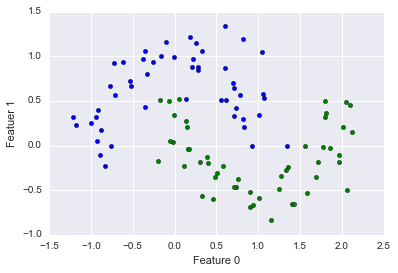

In [39]:
#have the dataset module make us some crescents
X,y = datasets.make_moons(noise=0.2, random_state=0)

#lets see what they look like
plot_classes(X,y)



Now let's train a logistic regression classifier to see how it does:

In [43]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.25)
#using a logistic regression classifier
classifier = linear_model.LogisticRegression()
classifier.fit(X_train, y_train)
success_rate = classifier.score(X_test, y_test)
print("Logistic Regression: " + str(success_rate))

Logistic Regression: 0.72


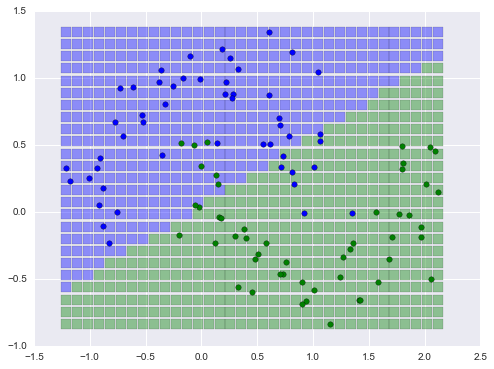

In [44]:
plot_classification(classifier,X,y)

As before, the logistic regression classifier did it's best to divide the data with one straight line. This isn't so good on data that happens to be distributed as shown above. Hence only 72% accuracy, as well.

In [45]:
#using a random forest classifier
classifier = ensemble.RandomForestClassifier()
classifier.fit(X_train, y_train)
success_rate = classifier.score(X_test, y_test)
print("Random Forest: " + str(success_rate))

Random Forest: 0.88


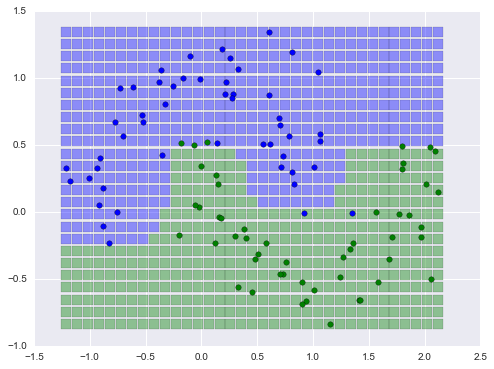

In [46]:
plot_classification(classifier,X,y)

The random forest classifier does much better; making of use of the complex boundary to wrap around the two crescents. However, it still isn't perfect, with an 88% success rate. This is still a significant increase over the logistic regression.

This shows that the choice of model can make a substantial difference on the outcome of a machine learning exercise. In general, as you explore machine learning, you'll see this topic come up again and again. The choice of model can make all the difference!


### More than Two Classes
We can easily extend these two classifiers to cases where there are more than three categories. The coding ends up being identical.

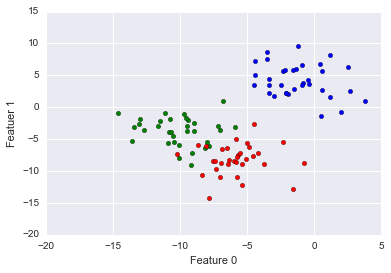

In [60]:
# Make three classes this time
X, y = datasets.make_blobs(centers=3, cluster_std=2.5, random_state=1)

# and lets see what they look like
plot_classes(X, y)

Logistic Regression: 0.92


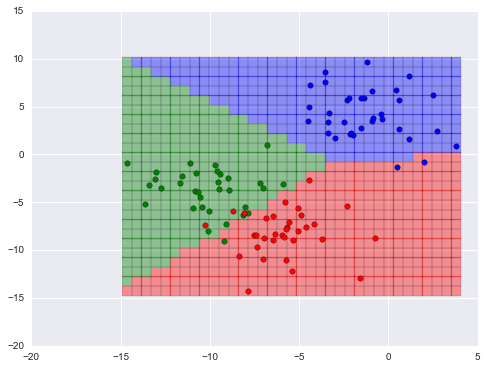

In [61]:
#Divide them up for testing and training
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.25)


#using a logistic regression classifier
classifier = linear_model.LogisticRegression()
classifier.fit(X_train, y_train)
success_rate = classifier.score(X_test, y_test)
print("Logistic Regression: " + str(success_rate))

plot_classification(classifier, X, y)


With more than two classes, the logistic regression classifer actualy draws several splits between the data. However, as shown above, the boundaries between classes still end up being straight.

Now let's try it again with a random forest classifier:

Random Forest: 1.0


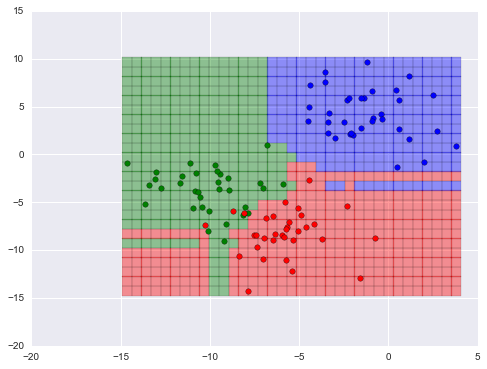

In [65]:
#using a random forest classifier
classifier = ensemble.RandomForestClassifier()
classifier.fit(X_train, y_train)
success_rate = classifier.score(X_test, y_test)
print("Random Forest: " + str(success_rate))

plot_classification(classifier, X, y)

In this case, the random forest had more trouble splitting up the data with horizontal and vertical cuts. Interestingly, since a random forest implementation actually does use randomization during it's processing, you can get different results when you re-run the code above. This is probably not ideal, and as it turns out, the sklearn authors thought so as well, and gave us a tool for compensating for it.

When we make the random forest classifier object, we can pass in an argument to tell the classifier how many times to re-try it's algorithm. It'll then give us the average results from all of it's runs. The default value is 10. Lets try increasing it to something a bit higher.

Random Forest: 0.96


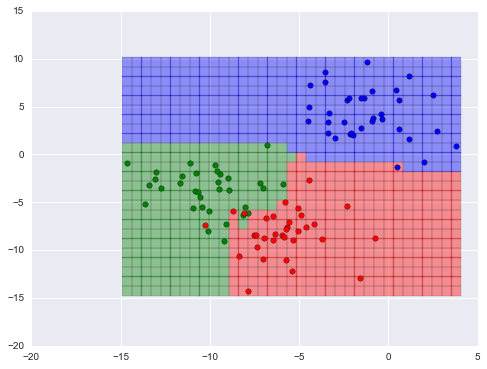

In [68]:
classifier = ensemble.RandomForestClassifier(n_estimators=30)
classifier.fit(X_train, y_train)
success_rate = classifier.score(X_test, y_test)
print("Random Forest: " + str(success_rate))

plot_classification(classifier, X, y)

Using more estimators means the analysis will take longer, but the results can often be somewhat better. 

### Lots of Classes

Now let's try just a few more examples, this time with even more classes

Logistic Regression: 0.84


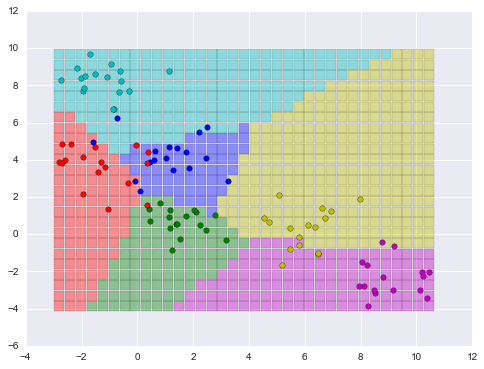

In [72]:

""" Many Classes """
X, y = datasets.make_blobs(centers=6, cluster_std=1, random_state=0)
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.25)


#using a logistic regression classifier
classifier = linear_model.LogisticRegression()
classifier.fit(X_train, y_train)
success_rate = classifier.score(X_test, y_test)
print("Logistic Regression: " + str(success_rate))

plot_classification(classifier, X, y)

Random Forest: 0.96


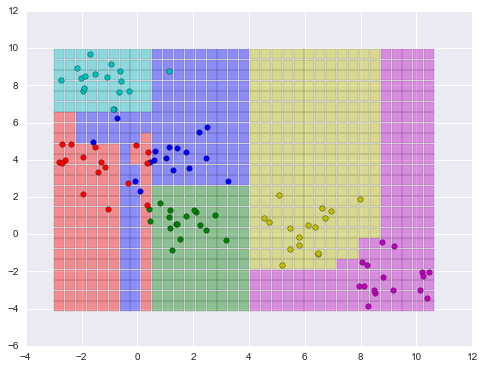

In [73]:
#using a random forest classifier
classifier = ensemble.RandomForestClassifier()
classifier.fit(X_train, y_train)
success_rate = classifier.score(X_test, y_test)
print("Random Forest: " + str(success_rate))

plot_classification(classifier, X, y)

### Real-World Data
Finally, we can look at a (highly-overused) data set taken from a botany paper on iris. There are three types of related irises. Four measurements were taken on samples of each of the three types of irises. The following code looks at the two classifiers we've already seen, and adds a new one: the *Support Vector Machine* or SVM. 

In [81]:
""" Iris Data
"""
iris_data = datasets.load_iris()
X = iris_data.data
y = iris_data.target
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.25)

#using a logistic regression classifier
classifier = linear_model.LogisticRegression()
classifier.fit(X_train, y_train)
success_rate = np.round(classifier.score(X_test, y_test),3)
print("Logistic Regression: " + str(success_rate))


#using a random forest classifier
classifier = ensemble.RandomForestClassifier()
classifier.fit(X_train, y_train)
success_rate = np.round(classifier.score(X_test, y_test),3)
print("Random Forest: " + str(success_rate))


#using an SVM classifier
classifier = svm.SVC()
classifier.fit(X_train, y_train)
success_rate = np.round(classifier.score(X_test, y_test),3)
print("SVM: " + str(success_rate))


Logistic Regression: 0.868
Random Forest: 0.921
SVM: 0.974


# When We Don't Have Classes

What if our data doesn't have classes?  All of the classifiers we've seen so far have relied on examples with known classes, so that future examples can be compared, and classified.  This type of learning is often called *supervised learning* because the process is guided, or supervised, by pre-labeled samples.  

We can instead try something which is called *unsupervised learning* where our algorithms will try to find their own patterns in the data, and let us know what they find. This can be a much trickier task, depending on the context, but thankfully, sklearn is here to help out!

### K-Means Clustering Algorithm

Suppose we have data which we believe has blobs or clusters, similar to what we saw in the examples above. However, we do not have the array we've been calling "y", which tells us which class each row in the "X" array belongs to. Instead, our job is to find out where the clumps might be, and make labels ourselves.

The K-means algorithm is a simplistic algorithm for doing just this. We start by creating the clustering object, and we'll tell it how many clusters we want it to look for. Then, we'll show it the data, and it will give *us* the labels back (whereas we've been giving the data *and* the labels up until now).

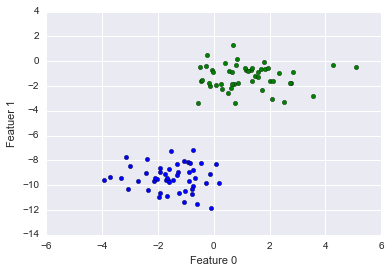

In [84]:
#Make two blobs and show them
X, y = datasets.make_blobs(centers=2, random_state=2)

plot_classes(X,y)



Now let's strip away the label data (the colors) and show it again:

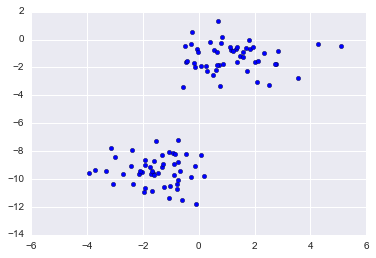

In [86]:
#some matplotlib code for making a scatter plot, using the first and second columns of X
plt.figure()
plt.scatter(X[:,0], X[:,1])
plt.show()

Our K-Means algorithm will have to look at the points above, and decide how best to divide them up into two classes (remember, we will tell K-means how many classes to look for.

In [90]:
cluster_finder = cluster.KMeans(n_clusters=2)
cluster_finder.fit(X)

labels = cluster_finder.labels_


And now let's use the labels we got, and re-draw the graph. It will hopefully look identical to the original one.

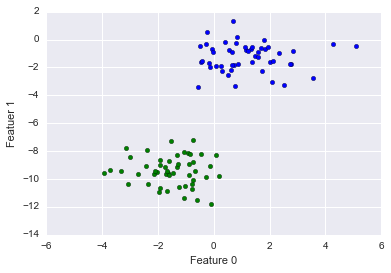

In [91]:
plot_classes(X,labels)

Look's pretty good! (Note: the colors may be reversed, but that is because the K-means algorithm doesn't know which label should be the "first" one and which should be the "second", so it just assigns them arbitrarily)

What happens when we tell K-means to find more than two classes?

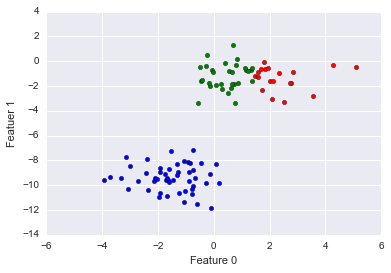

In [92]:
cluster_finder = cluster.KMeans(n_clusters=3)
cluster_finder.fit(X)

labels = cluster_finder.labels_
plot_classes(X, labels)

As shown, K-means will do exactly what you tell it. If you ask it to find more clusters than there "actually are" (note that this is a fairly vague idea to begin with...), it will do it's best to divide the points up appropriately. 

Let's do an example with many more clusters:

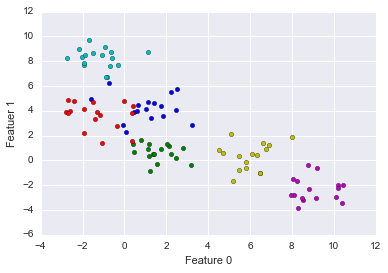

In [95]:
#Make six blobs and show them
X, y = datasets.make_blobs(centers=6, random_state=0)
plot_classes(X,y)

This should be a much trickier problem, as many of the blobs intersect. The following code blocks show the K-means results for varying numbers of classes:

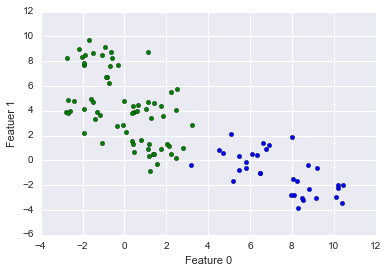

In [96]:
cluster_finder = cluster.KMeans(n_clusters=2)
cluster_finder.fit(X)
plot_classes(X, cluster_finder.labels_)

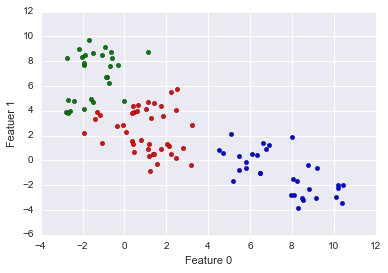

In [97]:
cluster_finder = cluster.KMeans(n_clusters=3)
cluster_finder.fit(X)
plot_classes(X, cluster_finder.labels_)

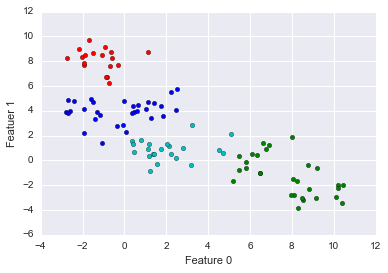

In [98]:
cluster_finder = cluster.KMeans(n_clusters=4)
cluster_finder.fit(X)
plot_classes(X, cluster_finder.labels_)

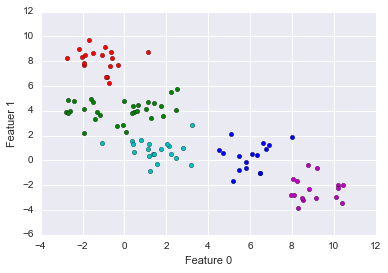

In [99]:
cluster_finder = cluster.KMeans(n_clusters=5)
cluster_finder.fit(X)
plot_classes(X, cluster_finder.labels_)

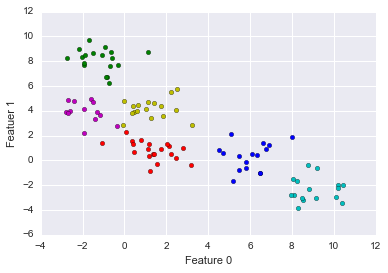

In [100]:
cluster_finder = cluster.KMeans(n_clusters=6)
cluster_finder.fit(X)
plot_classes(X, cluster_finder.labels_)

And for reference, let's see the original classes again:

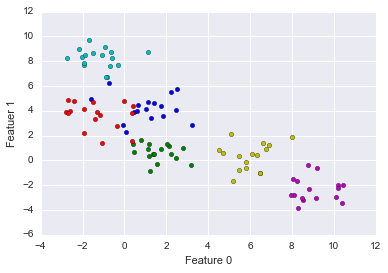

In [101]:
plot_classes(X,y)

The final two images are actually pretty good. There's some differences on the left side of the graphs, where the original clusters overlap, but in general, we've got a pretty good classification system, even when we didn't know which points belonged to which classes originally.

### DBSCAN
Another cluster-finding algorithm is called DBSCAN (there are lots of these, by the way). One nice thing about DBSCAN is that you don't need to tell it how many clusters there are, but instead, give it some information about how dense a cluster "ought to be", and let it see what it can find.  

First, we'll show DBSCAN with it's defualt settings, and as the plot shows, it doesn't find much.
Second, we'll show some values that I found after I played around with it a bit. 

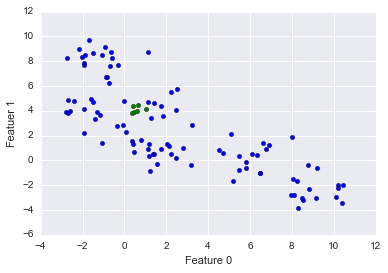

In [104]:
db_cluster_finder = cluster.DBSCAN()
db_cluster_finder.fit(X)
plot_classes(X, db_cluster_finder.labels_)

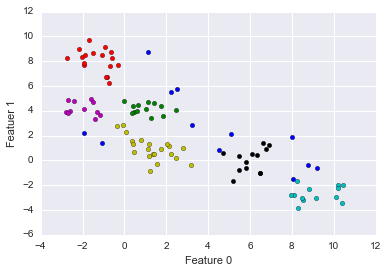

In [112]:
db_cluster_finder = cluster.DBSCAN(eps=1, min_samples=4)
db_cluster_finder.fit(X)
plot_classes(X, db_cluster_finder.labels_)

The above examples are included in order to demonstrate how much difference it can make when we choose the "right" parameters for a machine learning algorithm. These canned, out-of-the box procedures from scikit-learn are really impressive, but can still give wonky results if we don't know what we're up to. Sadly, there's no easy way to teach how to properly parameterize every model. But practice, as in all things, brings improvement!




## Regression: Finding Trends

For our last section, we'll shift gears from clusters and classes, and move on to trend prediction. Linear regression is one of the best known, and most well-used mathematical tools for modelling trends in numbers. If you've ever seen a "trendline" plotted through a cloud of points, you were most likely looking at the results of a linear regression analysis. 

Scikit-learn has lots of models for find linear (a.k.a straight) trends, and can also help us find non-linear (curved, segmented, or otherwise "not straight") trends in data.  And just as with the classification and cluster-finding tools demonstrated above, the sklearn models make it super easy to fit a trendline to data, and to predict the output values of new inputs.

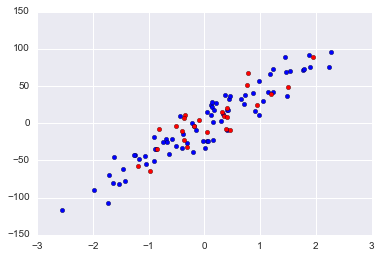

In [8]:
X, y = datasets.make_regression(n_features=1, n_informative=1, n_targets=1, noise=15.0, random_state=0)
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.25)

#show the dataset, but this time, just for fun, highlight the test point that cross_validation chose for us.
plt.figure()
plt.scatter(X_train,y_train,c='blue')
plt.scatter(X_test,y_test,c='red')
plt.show()

In [11]:
trendline = linear_model.LinearRegression()
trendline.fit(X_train,y_train)
print(trendline.coef_)
print(trendline.intercept_)

[ 43.21503735]
-1.62252755011


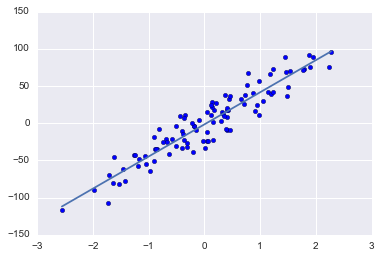

In [18]:
#let's plot the trendline.

#get the maximum and minimum x values (horizontal axis)
line_x_vals = [[np.min(X)], [np.max(X)]]
#get the predicted y values, which will fall on the line
line_y_vals = trendline.predict(line_x_vals)

plt.figure()
#plot the data points
plt.scatter(X,y)
#draw the line
plt.plot(line_x_vals, line_y_vals)

plt.show()

We can also get an idea of how accurate our trendline is at predicting the y value of new points, just as we did with the classification models. However, the score that is returned means something a bit different. Instead of telling us how many points are exactly on the line (it would be ~none, since lines are infinitely thin), the score metric is what is called an "R-squared" value.

An R-squared value is a statistic that describes how much of the total _variance_ in a sample can be explained by our line. Variance itself is another statistic, which describes how spread out, or clumped together a group of samples are. So in this case, we can say that X% of the spread of the sample points can be explained well (by our line) and the rest of the spread is unexplained, and is sometimes called "noise" in the data.

In [17]:
print(trendline.score(X_test,y_test))

0.757306761979


### Housing Price Data

We can use a linear regression even when we have more than just an _X_ and a _y_ variable.  It's harder to graph when we move away from two dimensions, but the underlying mathematics actaully work the same way. 

Included in scikit is a dataset for housing prices in Boston, and several associated characteristics of the houses when they were sold. Let's load up the data and look at it:

In [25]:
boston_data = datasets.load_boston()


In [27]:
boston_data.keys()
    

dict_keys(['DESCR', 'data', 'target', 'feature_names'])

In [32]:
boston_data['feature_names']
    

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='<U7')

In [33]:
boston_data['DESCR']

"Boston House Prices dataset\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n        - PTRATIO  pupil-teac

Now let's use the included 'data', which describes each house, and 'target' which was the actual selling price of each house, and use it to build a linear regression model which we can use to predict the values of new houses. We do this in the same way as we did with the analysis above:

In [36]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(boston_data['data'], boston_data['target'], test_size=0.25)

boston_regressor = linear_model.LinearRegression()
boston_regressor.fit(X_train, y_train)

print(boston_regressor.score(X_test, y_test))


0.732386957245


And as before, our linear regression model can make sense of about 73% of the spread in the sample points.

Next, lets make a new house, which has completely average values for every feature, and see how much it is worth. To do this, I'm going to import the pandas library, which has some extremely handy tools for data manipulation, and in particular, can quickly describe all the things we might want to know, like minima, maxima, means, etc...

In [54]:
import pandas as pd
boston_df = pd.DataFrame(boston_data['data'])
boston_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [57]:
boston_prices = pd.DataFrame(boston_data['target'])
boston_prices.describe()

,0
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


In [58]:
# A completely 'average' house
new_house = [[3.59,11.36,11.13,0.069,0.55,6.28,68.57,3.79,9.54,408.23,18.45,356.67,12.65]]
print(boston_regressor.predict(new_house))

[ 22.49889426]


In [59]:
# A house where every feature is very high, whatever that happens to mean
new_house = [[88.97,100.00,27.74,1.0,0.87,8.7,100.0,12.12,4.0,711.00,22.00,396.9,37.97]]
print(boston_regressor.predict(new_house))

[-12.37485113]


In [60]:
# A where every feature is the very lowest, whatever THAT means
new_house = [[3.59,11.36,11.13,0.06,0.55,6.28,68.57,3.79,9.54,408.23,18.45,356.67,12.65]]
print(boston_regressor.predict(new_house))

[ 22.48547656]


Note the negative value of the house where we maximized all features. It was a very high-taxed house, with lots of crime, pollution, industry, and very far from the freeway, and with the highest student-teacher ratio in the set. Apparently not many houses are sold with all of those features! Our regression model suggests that it's value is actually negative, at least compared with the other houses in the dataset.

However, this raises a very important point about trend-finding tools, be they regressions or otherwise. Typically, we'll be much better at predicting the value of a new sample point when it is a lot like the other sample points in our data set. But when we see values that are outside of the range of our initial sample, or where the _combination_ of values is very unsual, the accuracy of our predictions can drop significantly!


## Further Resources

1) Scikit-learn Tutorials: http://scikit-learn.org/stable/tutorial/

2) *Highly Recommended*: Jake VanderPlas' Sklearn tutorial: https://www.youtube.com/watch?v=L7R4HUQ-eQ0&list=WL&index=2

For people with more math background:

3) Courera's Machine Learning Course from Standford, by Andrew Ng: https://www.coursera.org/learn/machine-learning